# Two dataset simulation case study

In [42]:
from glotaran.io import load_scheme, load_parameters
from glotaran.simulation import simulate
import numpy as np
from pyglotaran_extras import plot_data_overview

time_axis = np.arange(-1, 20, 0.01)
spectral_axis = np.arange(600, 700, 1.4)
simulation_coordinates = {"time": time_axis, "spectral": spectral_axis}

## Simulate data

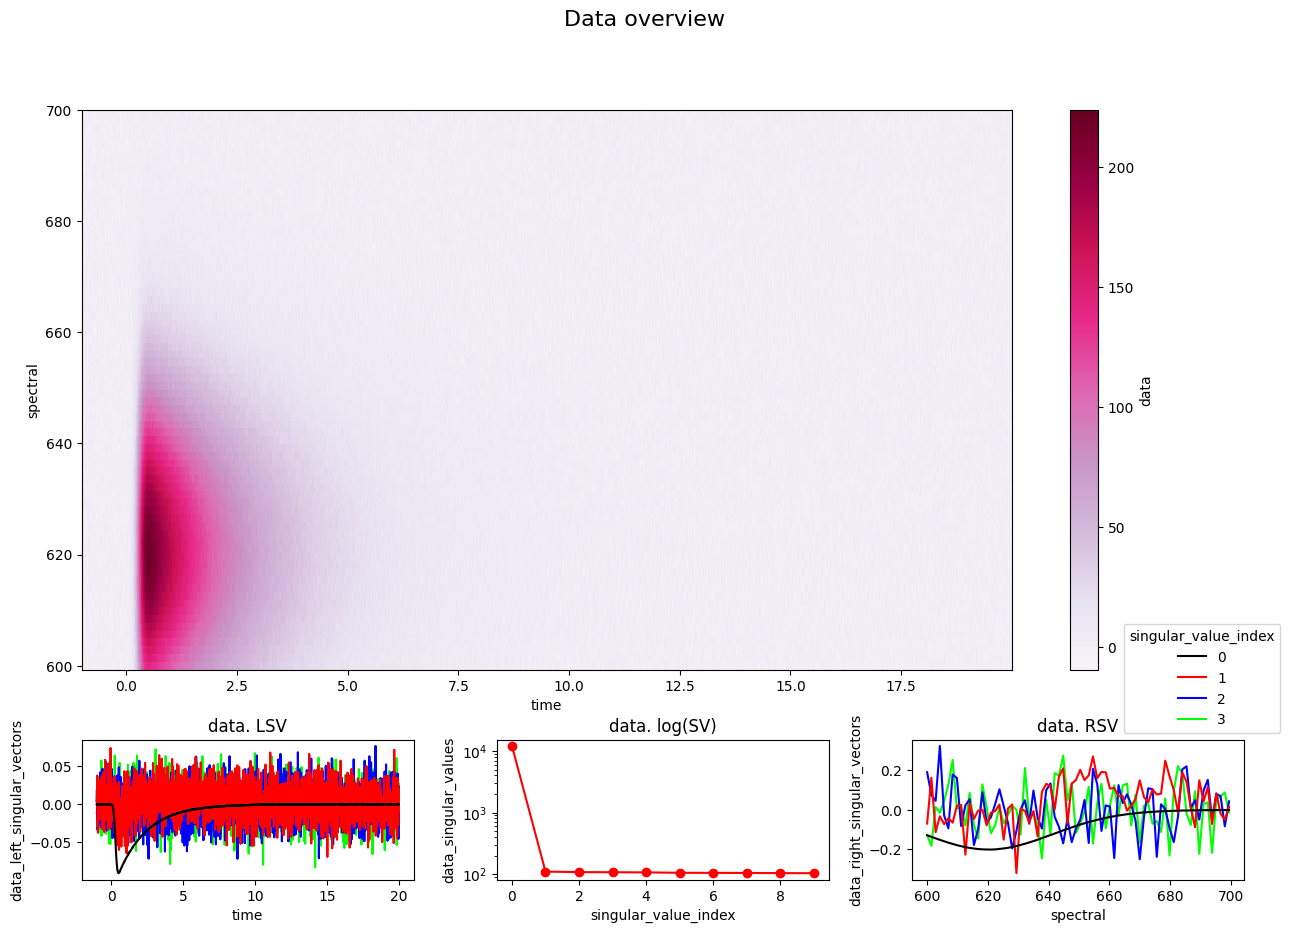

In [43]:
sim_scheme = load_scheme("models/sim-scheme.yaml")

ds1 = simulate(
    model=sim_scheme.experiments["sim"].datasets["dataset_1"],
    library=sim_scheme.library,
    parameters=load_parameters("models/sim-params.yaml"),
    coordinates=simulation_coordinates,
    noise=True,
    noise_seed=42,
    noise_std_dev=2

)
plot_data_overview(ds1);

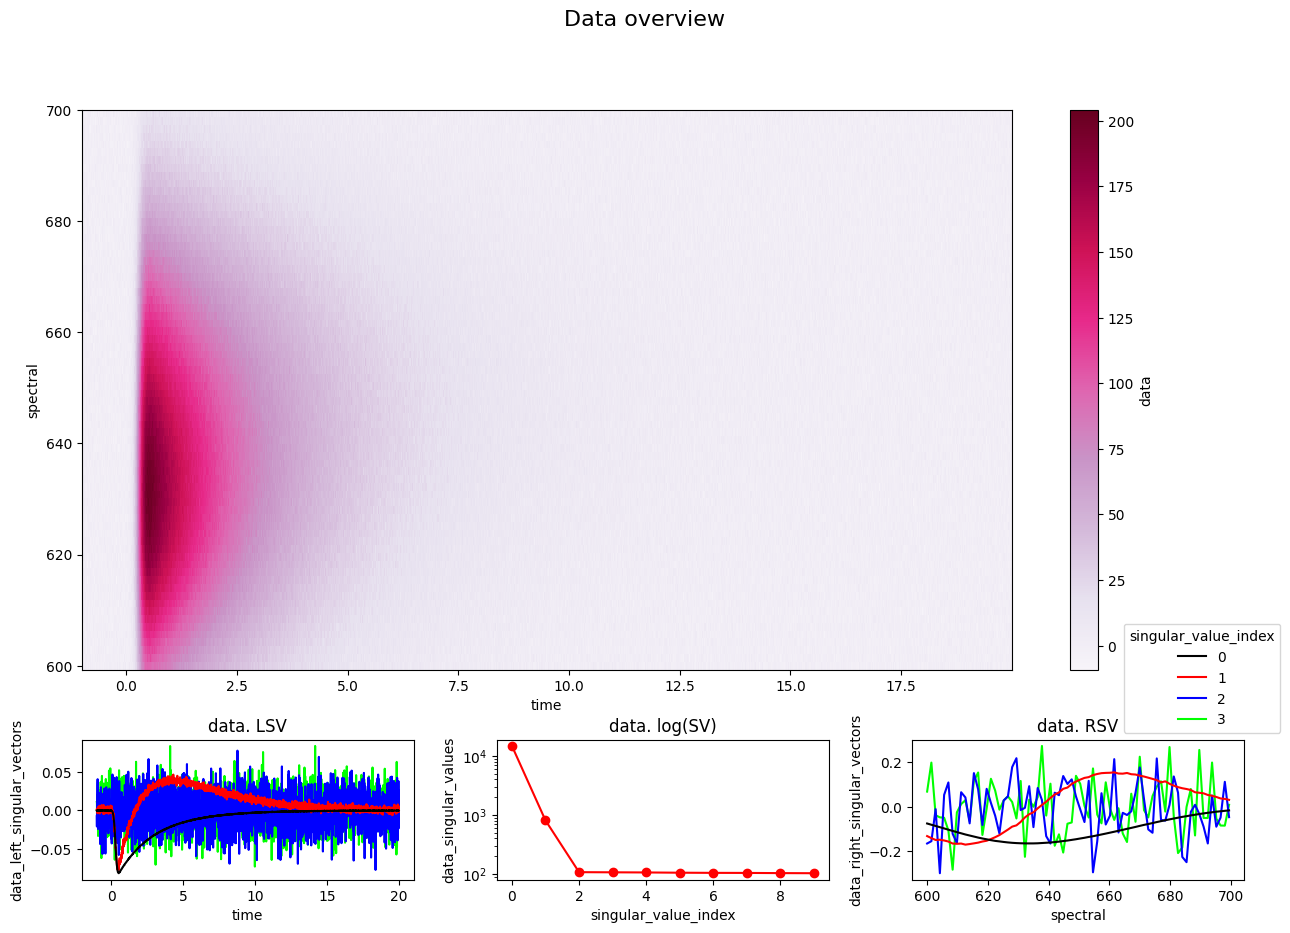

In [44]:
ds2 = simulate(
    model=sim_scheme.experiments["sim"].datasets["dataset_2"],
    library=sim_scheme.library,
    parameters=load_parameters("models/sim-params.yaml"),
    coordinates=simulation_coordinates,
    noise=True,
    noise_seed=42,
    noise_std_dev=2
)
plot_data_overview(ds2);

In [45]:
ds2.data[0,:]

<xarray.DataArray 'data' (spectral: 72)>
array([ 0.60943416, -2.07996821,  1.50090239,  1.88112943, -3.90207038,
       -2.60435901,  0.25568081, -0.63248518, -0.03360232, -1.70608786,
        1.75879595,  1.55558387,  0.1320614 ,  2.25448241,  0.93501868,
       -1.71858493,  0.73750157, -1.9177652 ,  1.7569006 , -0.09985182,
       -0.36972473, -1.36185909,  2.44508268, -0.30905896, -0.85665564,
       -0.7042671 ,  1.06461837,  0.73088813,  0.82546522,  0.86164201,
        4.2832952 , -0.81283003, -1.02448546, -1.62754546,  1.23195885,
        2.25794459, -0.22789492, -1.68031295, -1.64896243,  1.30118558,
        1.48650834,  1.08630854, -1.33101941,  0.46432265,  0.23337162,
        0.43737719,  1.74285756,  0.4471911 ,  1.35782713,  0.13515814,
        0.5782388 ,  1.26257645, -2.91431164, -0.63934243, -0.94074531,
       -1.2777557 , -0.5502845 ,  2.98988262, -1.73166223,  1.93655671,
       -3.36573954, -0.66977006,  0.32550613,  1.17244466,  1.42245316,
        1.58669447, -0.69745014, -0.92470359,  1.71595176, -0.38260865,
       -2.55137265, -2.26657443])
Coordinates:
    time      float64 -1.0
  * spectral  (spectral) float64 600.0 601.4 602.8 604.2 ... 696.6 698.0 699.4

## Fitting with link_clp true (default)

In [46]:
fit_scheme_clp_false = load_scheme("models/fit-scheme_link_clp_true.yaml")
fit_scheme_clp_false.load_data({"dataset_1": ds1, "dataset_2": ds2})

In [47]:
result = fit_scheme_clp_false.optimize(load_parameters("models/fit-params.yaml"))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3388e+07                                    1.24e+08    
       1              2         3.6451e+06      9.74e+06       1.56e+00       4.95e+07    
       2              3         8.9301e+05      2.75e+06       3.13e+00       1.16e+07    
       3              5         6.1224e+05      2.81e+05       1.56e+00       9.61e+05    
       4              7         6.0935e+05      2.88e+03       7.82e-01       6.51e+04    
       5              8         6.0934e+05      1.42e+01       1.56e+00       3.38e+04    
       6              9         6.0933e+05      7.49e+00       1.56e+00       1.37e+04    
       7             11         6.0933e+05      1.37e+00       7.82e-01       3.47e+03    
       8             12         6.0933e+05      8.20e-02       1.56e+00       1.17e+03    
       9             14         6.0933e+05      1.01e-02       7.82e-01       2.36e+02    

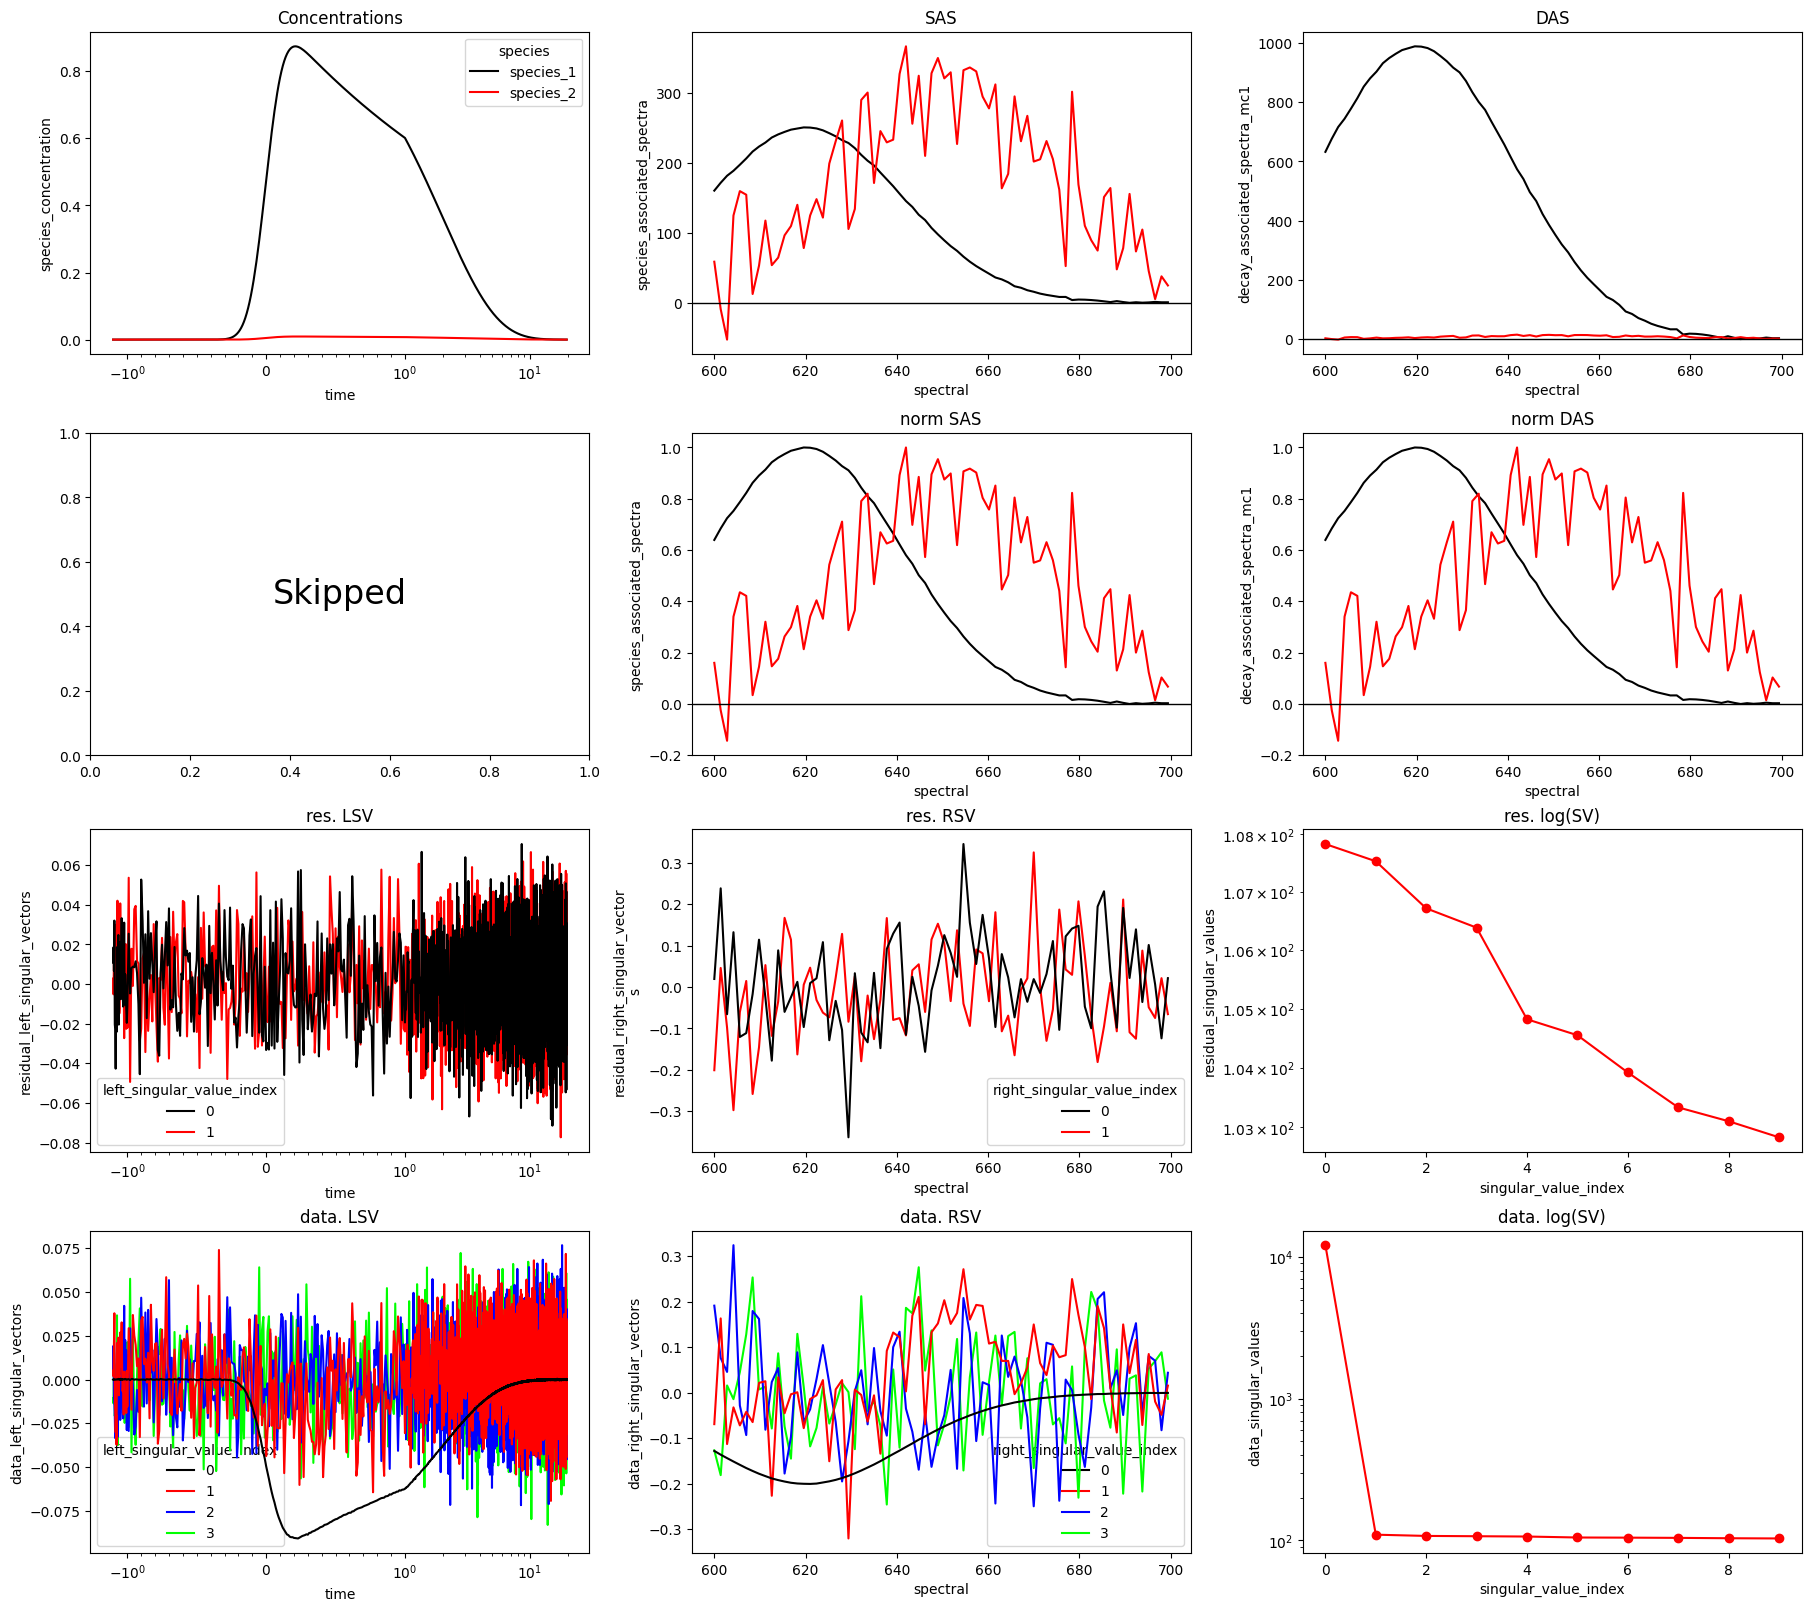

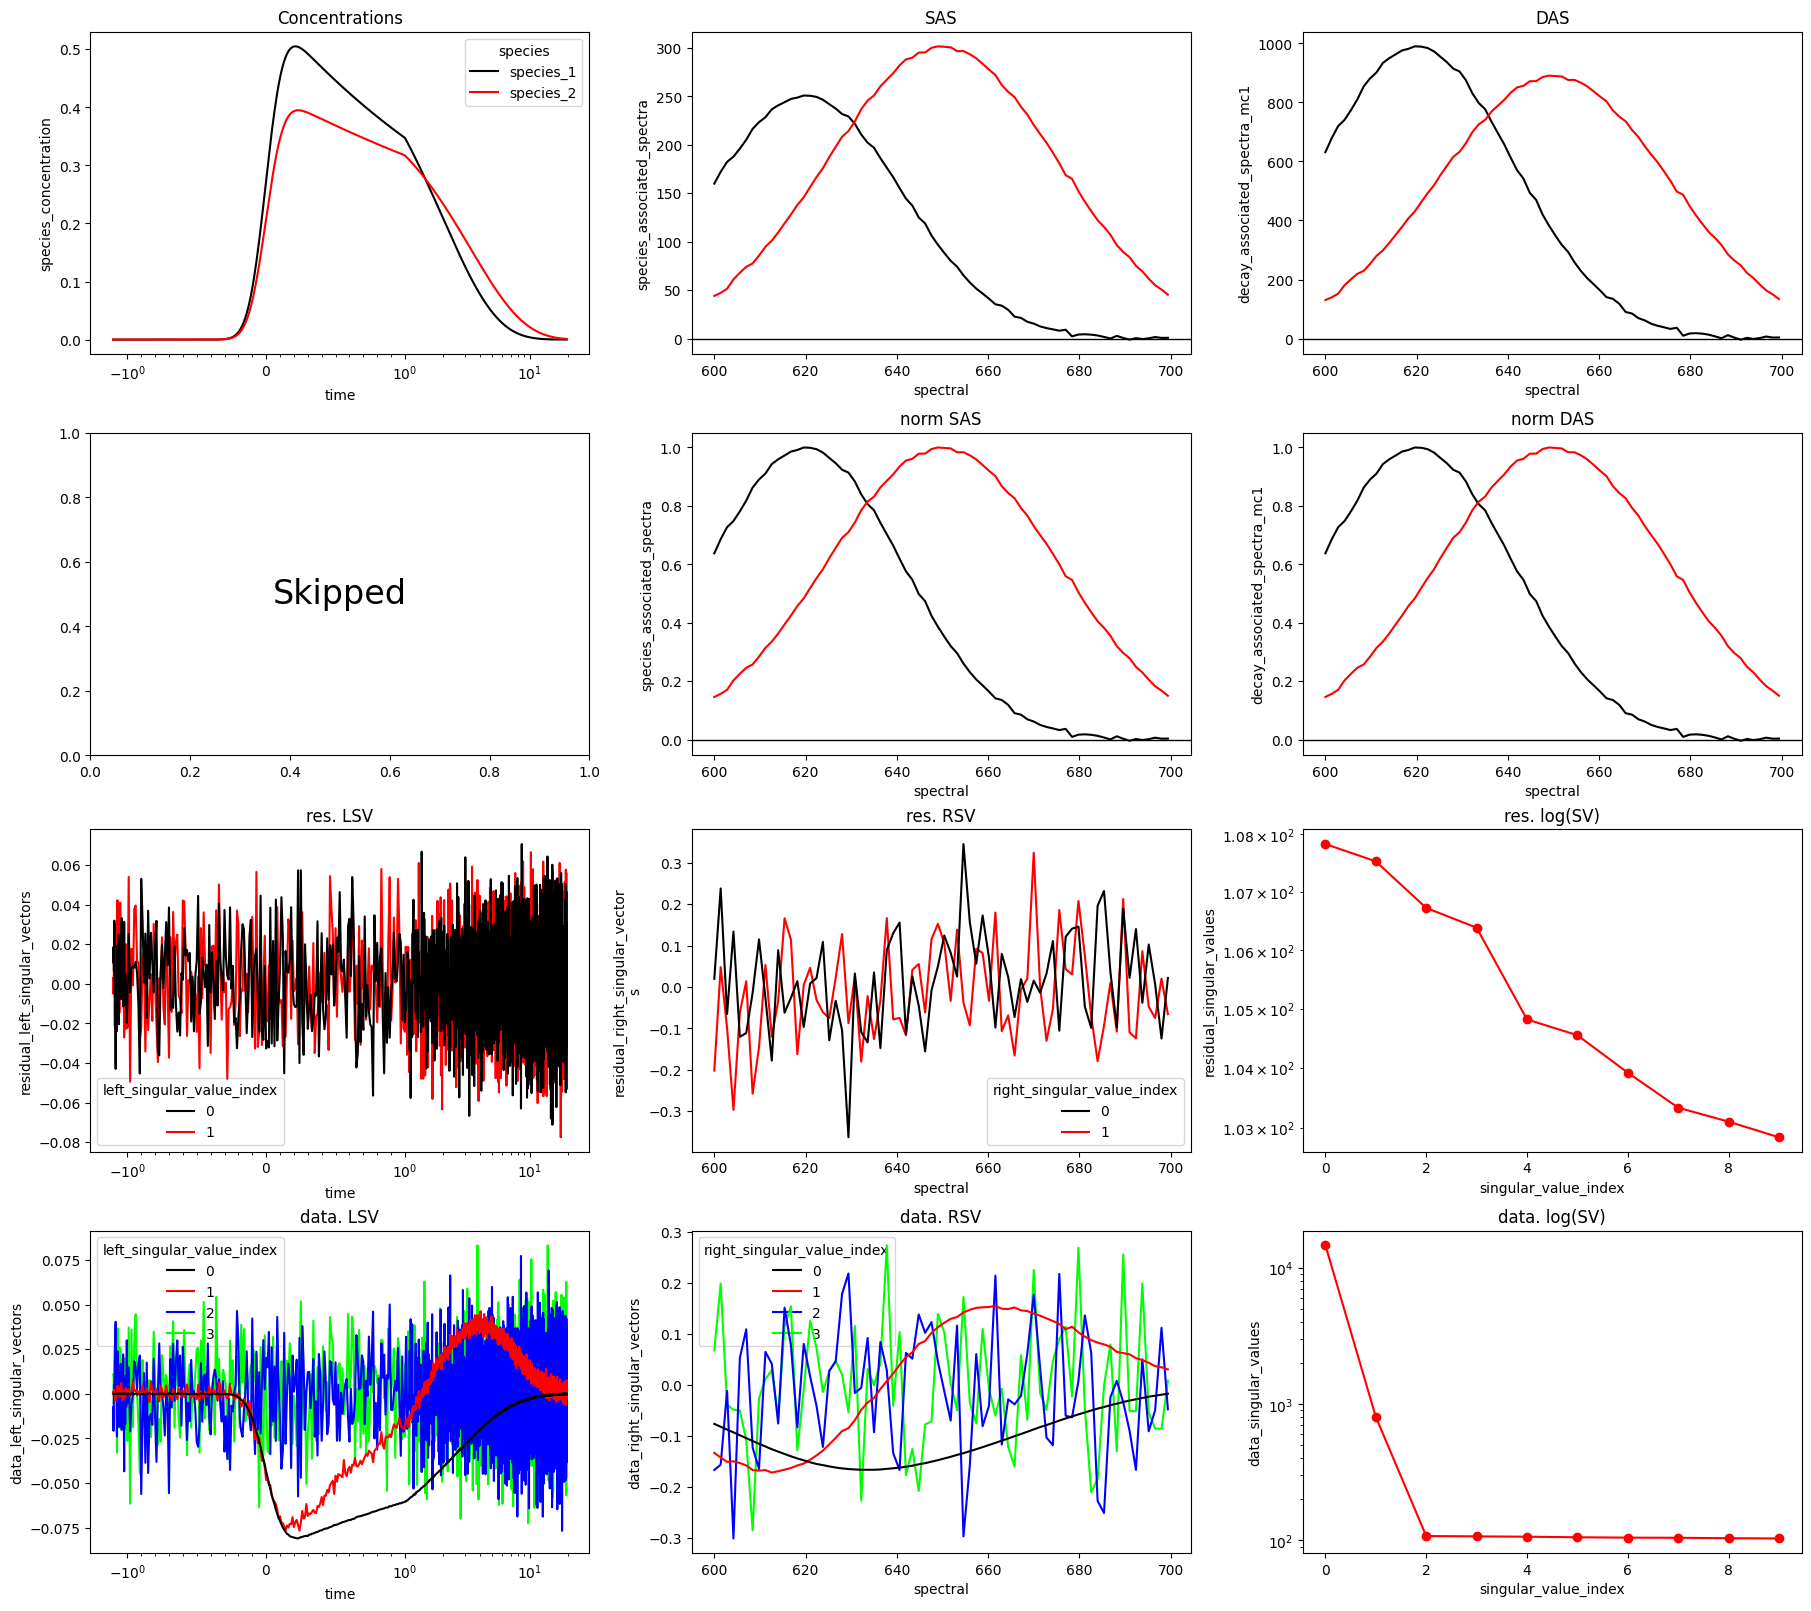

In [48]:
from pyglotaran_extras import plot_overview
from pyglotaran_extras.compat.convert_result_dataset import convert_dataset

plot_overview(convert_dataset(result.data["dataset_1"]), show_data=None)
plot_overview(convert_dataset(result.data["dataset_2"]), show_data=None);

## Fit with 'link_clp' false (datasets in different experments)

In [49]:
fit_scheme_clp_false = load_scheme("models/fit-scheme_link_clp_false.yaml")
fit_scheme_clp_false.load_data({"dataset_1": ds1, "dataset_2": ds2})
result_link_clp_false = fit_scheme_clp_false.optimize(load_parameters("models/fit-params.yaml"))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.6463e+06                                    4.51e+07    
       1              2         9.4348e+05      2.70e+06       1.56e+00       1.77e+07    
       2              3         6.1710e+05      3.26e+05       3.13e+00       1.40e+06    
       3              4         6.0916e+05      7.94e+03       6.26e+00       7.28e+04    
       4              5         6.0910e+05      6.44e+01       1.25e+01       1.25e+02    
       5              6         6.0910e+05      1.21e-03       2.50e+01       1.04e+00    
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 3.6463e+06, final cost 6.0910e+05, first-order optimality 1.04e+00.


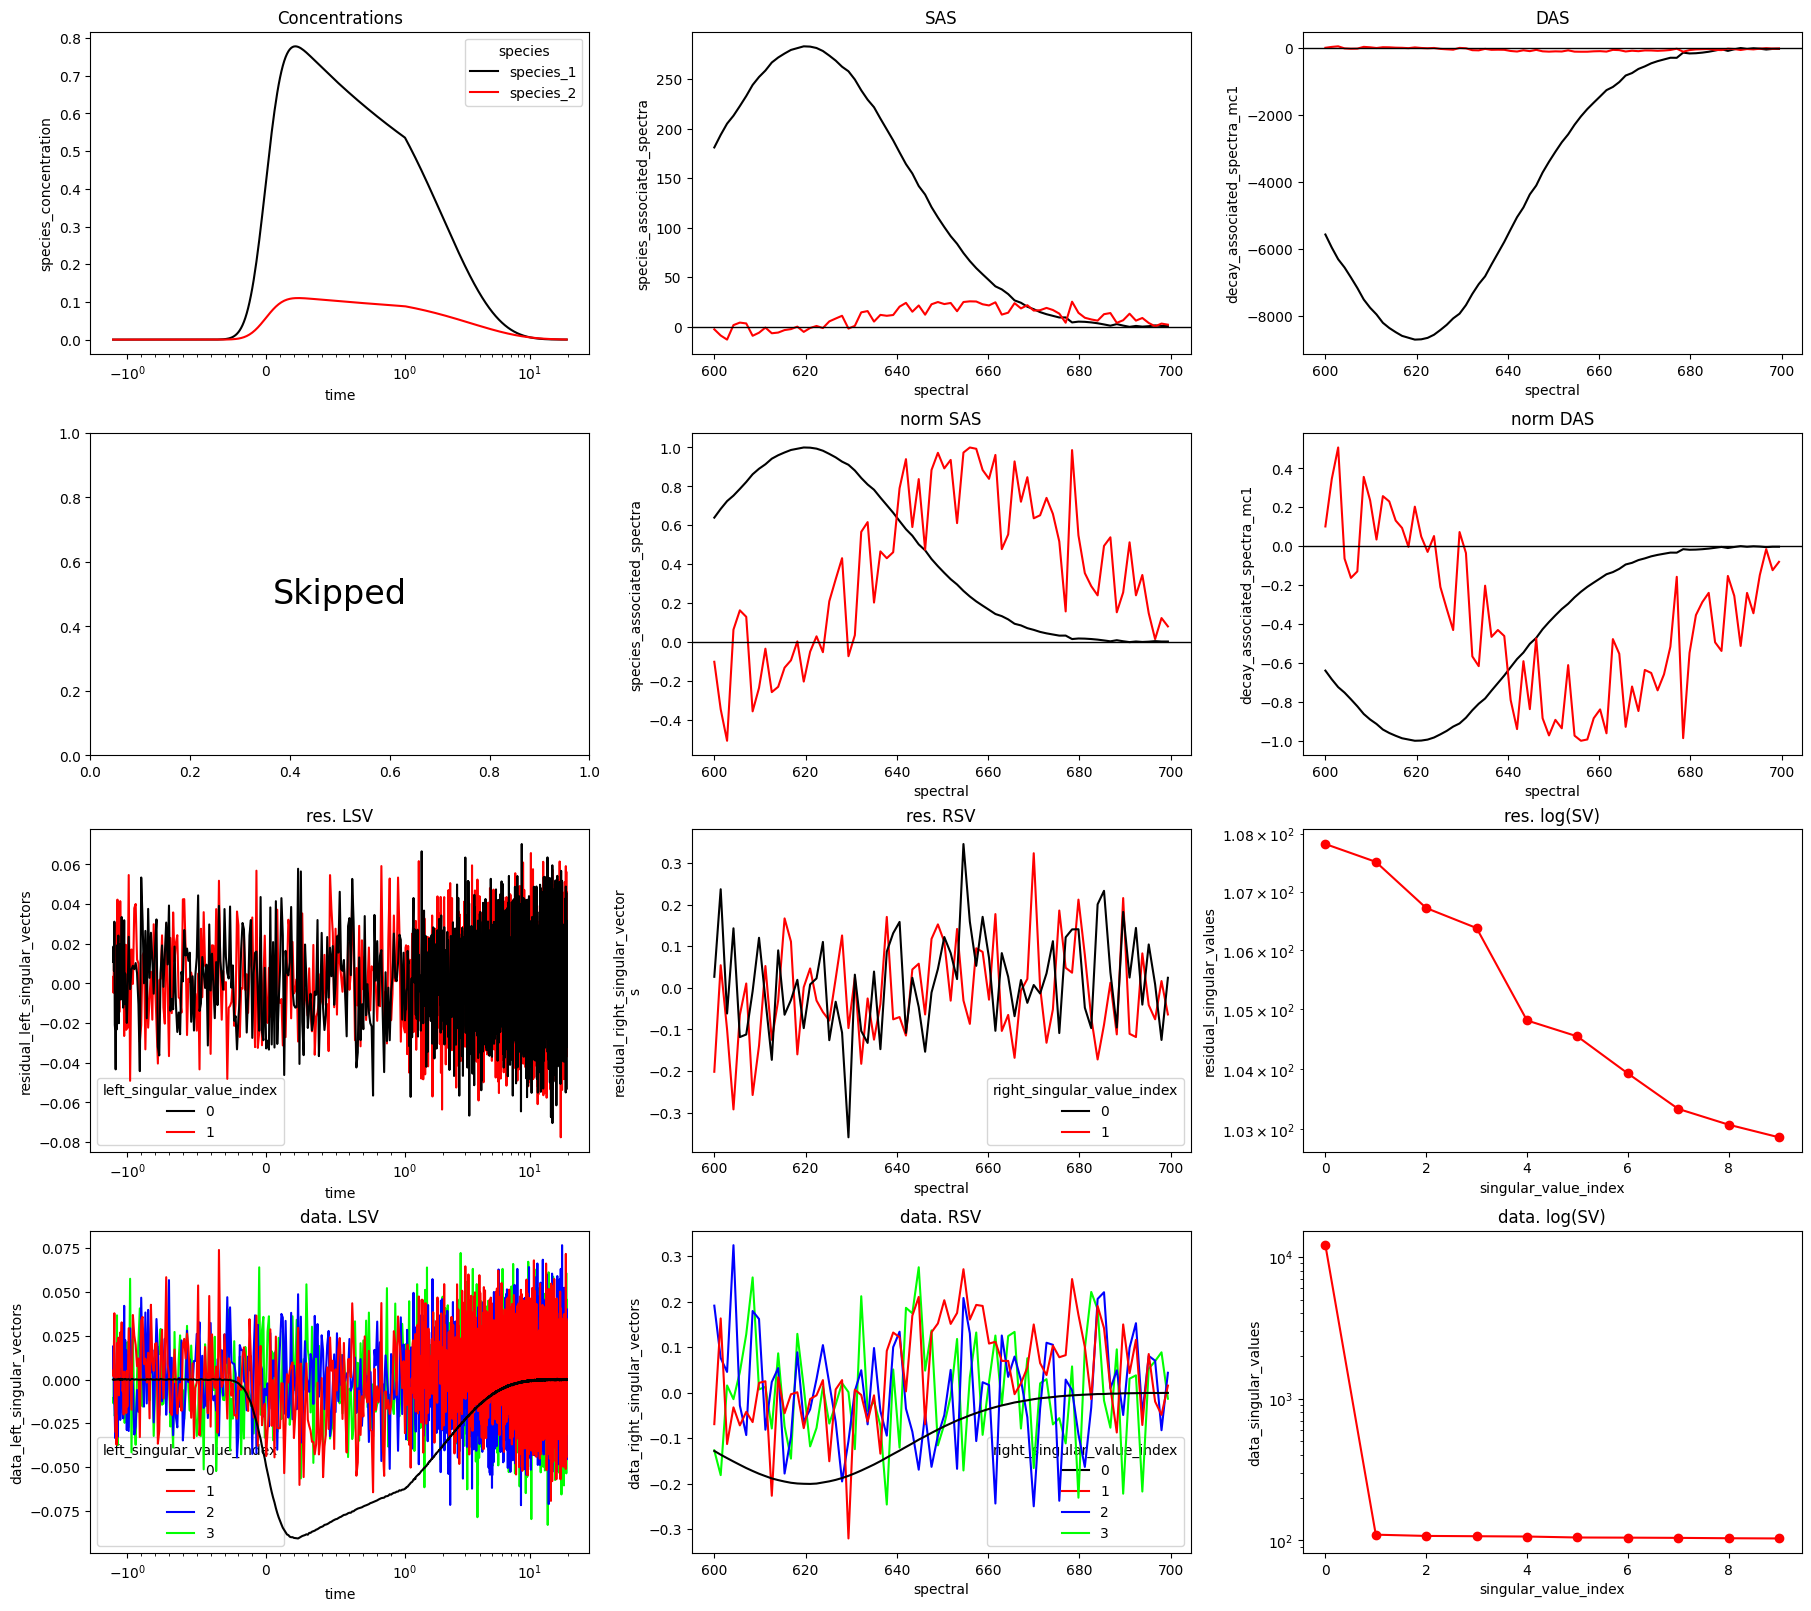

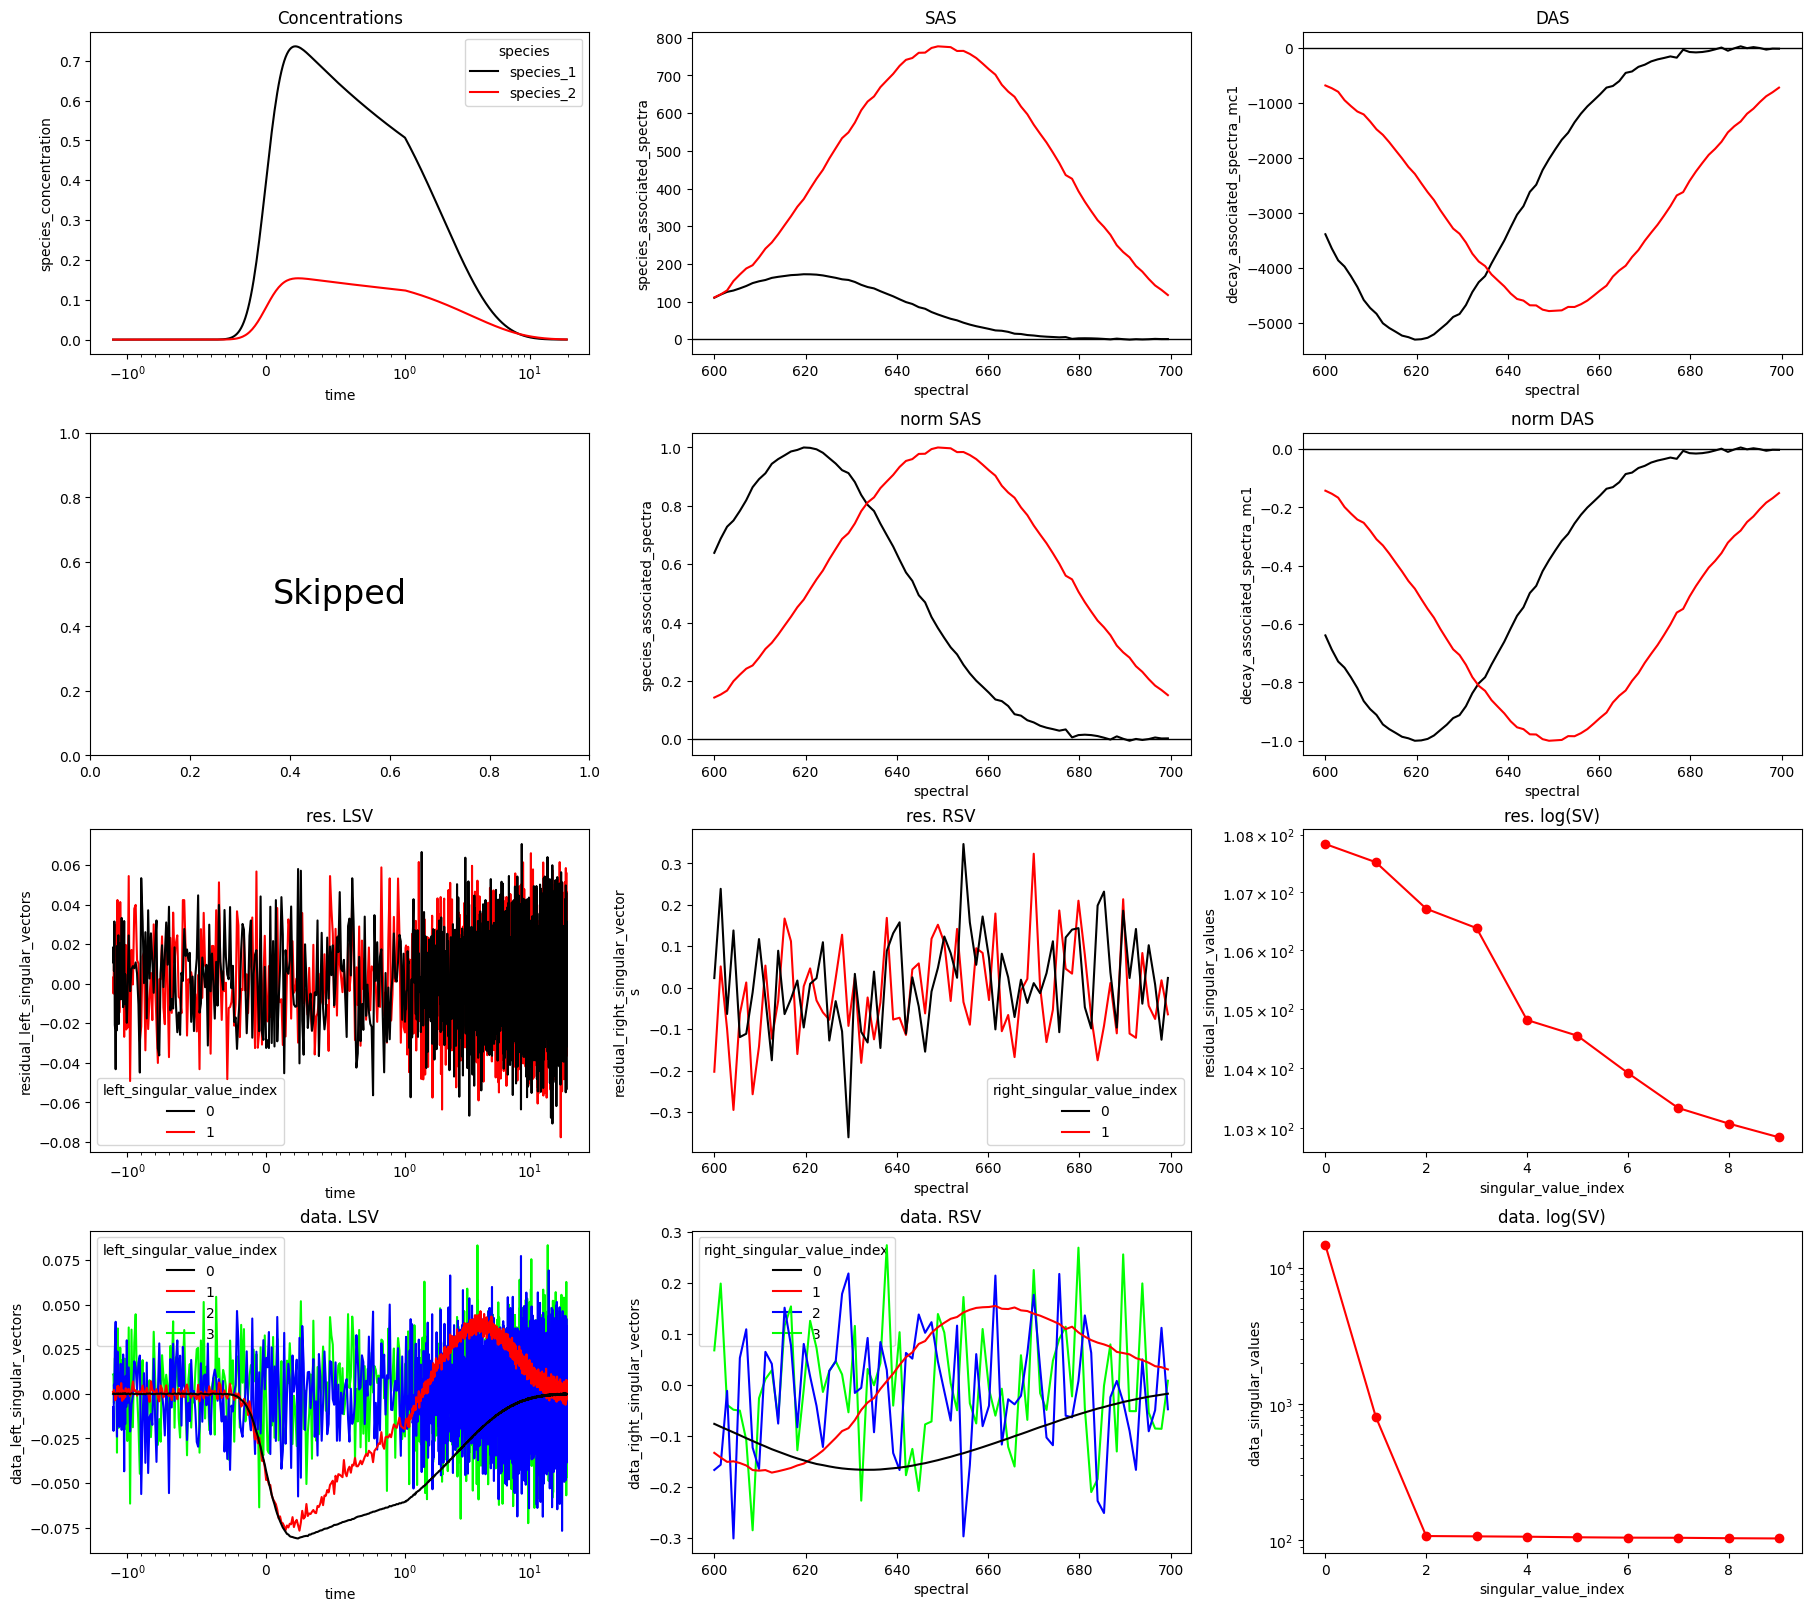

In [50]:
from pyglotaran_extras import plot_overview

plot_overview(convert_dataset(result_link_clp_false.data["dataset_1"]), show_data=None)
plot_overview(convert_dataset(result_link_clp_false.data["dataset_2"]), show_data=None);